In [1]:
# Let's first import library needed for cleaning
import pandas as pd
import numpy as np

### 1. Data Cleaning

In [2]:
# Load data
df = pd.read_csv(r'DS DATA.csv')
df.head(5)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [3]:
# 1. Inspecting data
print("Initial Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Initial Shape: (32561, 16)

Column Names:
 ['Age', 'Profession Class', 'Final_census', ' Education', ' Education-num', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week', ' country', ' income', 'Unnamed: 15']

Data Types:
 Age                   int64
Profession Class     object
Final_census          int64
 Education           object
 Education-num        int64
 marital-status      object
 occupation          object
 relationship        object
 race                object
Gender               object
 capital-gain         int64
 capital-loss         int64
 hours-per-week       int64
 country             object
 income              object
Unnamed: 15         float64
dtype: object


In [4]:
# 2. Standardize column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
)

print("\nColumn Names:\n", df.columns.tolist())


Column Names:
 ['age', 'profession_class', 'final_census', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income', 'unnamed:_15']


In [5]:
# 3. Checking missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age                     0
profession_class        0
final_census            0
education               0
education_num           0
marital_status          0
occupation              0
relationship            0
race                    0
gender                  0
capital_gain            0
capital_loss            0
hours_per_week          0
country                 0
income                  0
unnamed:_15         32559
dtype: int64


In [6]:
# As there is only missing value in 'unnamed:_15' and it is a very fishy col as well lets drop it
df.drop(columns=['unnamed:_15'], inplace=True)
print("\nColumn Names:\n", df.columns.tolist())


Column Names:
 ['age', 'profession_class', 'final_census', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income']


In [7]:
# Strip leading/trailing spaces from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [8]:
# Replace '?' or similar unknowns with NaN
df.replace(['?', 'NA', 'N/A', 'na', '--'], np.nan, inplace=True)

In [9]:
# 5. Fix dtypes (convert numeric strings)
num_cols = ['age', 'final_census', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
# 6. Handle missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Values': missing_count,
    'Missing_Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing_Percentage (%)', ascending=False)

print("\nMissing Values Summary:\n")
print(missing_df[missing_df['Missing_Percentage (%)'] > 0.00])


Missing Values Summary:

                  Missing_Values  Missing_Percentage (%)
occupation                  1843                    5.66
profession_class            1836                    5.64
country                      583                    1.79


- As the missing values are very small in quantity, we can remove them as well. But lets interpolate those few data points so as to have more data to us.

In [11]:
# Simple fill: mode for categorical, median for numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [12]:
# 7. Encode target variable (Income)
print("\nBefore Encoding:")
print(df['income'].unique())

# Map categories to binary
income_map = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_map)

print("\nAfter Encoding:")
print(df['income'].unique())


Before Encoding:
['<=50K' '>50K']

After Encoding:
[0 1]


In [13]:
# 8. Final check
print("\nCleaned Data Shape:", df.shape)
print("\nRemaining Missing Values:\n", df.isnull().sum().sum())


Cleaned Data Shape: (32561, 15)

Remaining Missing Values:
 0


In [14]:
# Target distribution with counts and percentages
print("Target Distribution:")

target_counts = df['income'].value_counts()
target_percent = df['income'].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percent.round(2)
})

print(target_summary)

Target Distribution:
   Count  Percentage (%)
0  24720           75.92
1   7841           24.08


- This implies that the data is moderately imbalanced.

In [15]:
# 9. Save cleaned file for next step
df.to_csv("cleaned_income_data.csv", index=False)
print("Data cleaned successfully and saved as 'cleaned_income_data.csv'")

Data cleaned successfully and saved as 'cleaned_income_data.csv'


### 2. Exploratory Data Analysis (EDA)

In [16]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_income_data.csv")

In [17]:
# 1. Dataset Overview
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

print("\nSummary Statistics (Numeric Columns):")
print(df.describe())

print("\nUnique values in categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Shape of dataset: (32561, 15)

Data Types:
 age                  int64
profession_class    object
final_census         int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
gender              object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
country             object
income               int64
dtype: object

Summary Statistics (Numeric Columns):
                age  final_census  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.00000

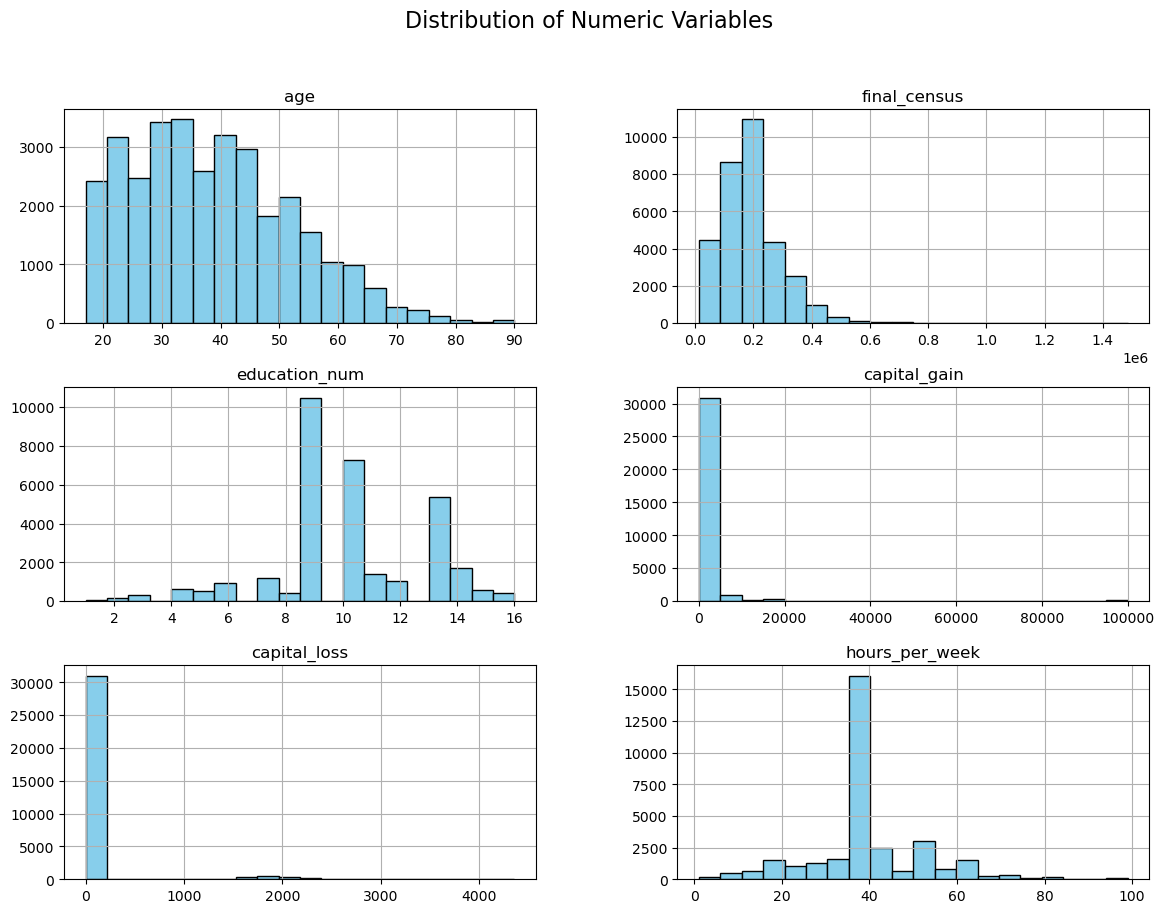

In [18]:
# 2. Univariate Analysis

# Numeric distributions
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('income')
df[num_cols].hist(figsize=(14,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.show()

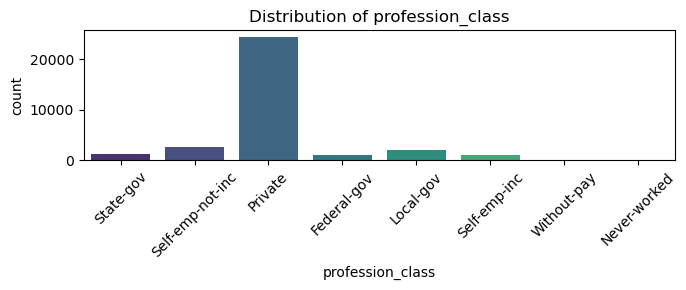

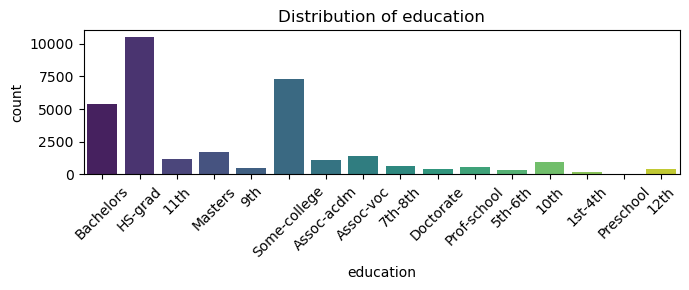

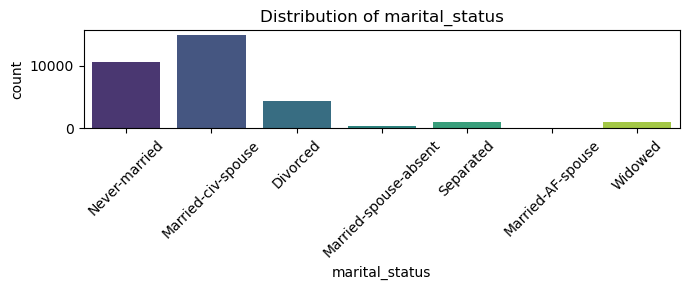

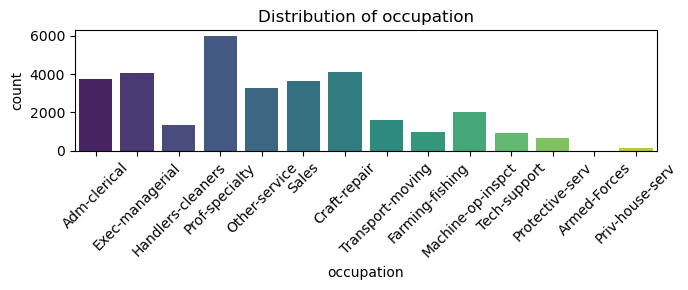

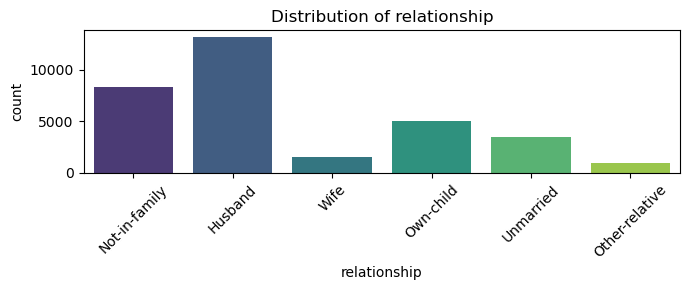

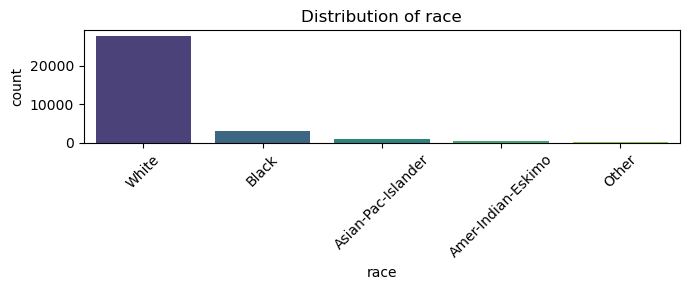

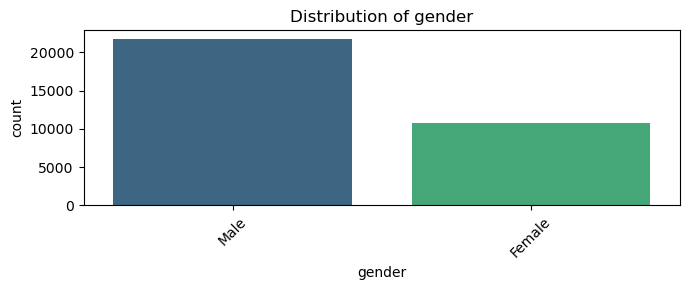

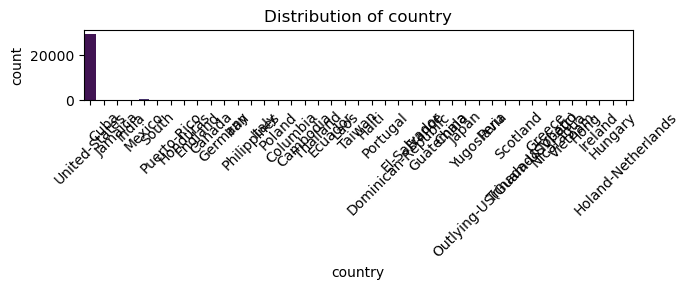

In [19]:
# Categorical distributions
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

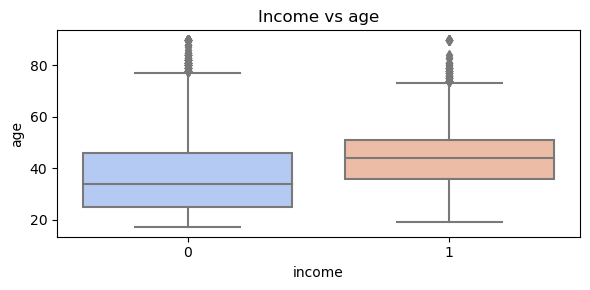

age: Mean (<=50K) = 36.78, Mean (>50K) = 44.25


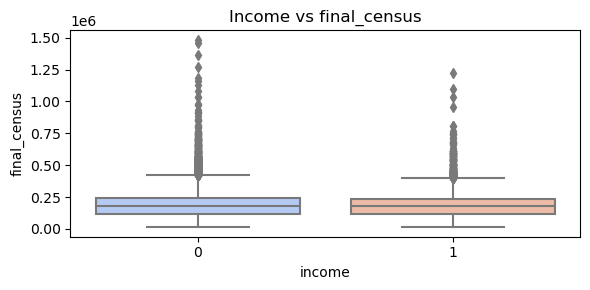

final_census: Mean (<=50K) = 190340.87, Mean (>50K) = 188005.00


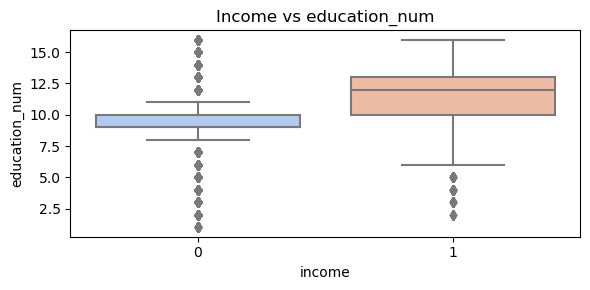

education_num: Mean (<=50K) = 9.60, Mean (>50K) = 11.61


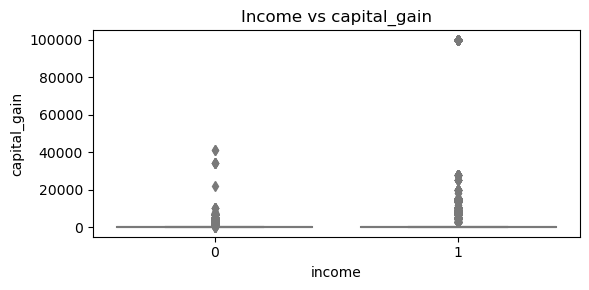

capital_gain: Mean (<=50K) = 148.75, Mean (>50K) = 4006.14


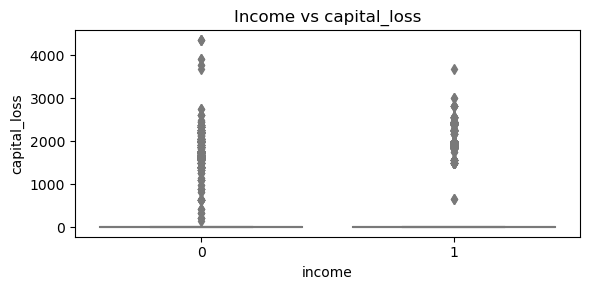

capital_loss: Mean (<=50K) = 53.14, Mean (>50K) = 195.00


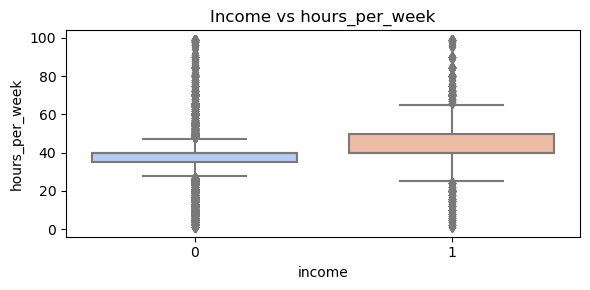

hours_per_week: Mean (<=50K) = 38.84, Mean (>50K) = 45.47


In [20]:
# 3. Bivariate Analysis

# Numeric vs Income
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='income', y=col, data=df, palette='coolwarm')
    plt.title(f"Income vs {col}")
    plt.tight_layout()
    plt.show()
    
    mean_low = df[df['income']==0][col].mean()
    mean_high = df[df['income']==1][col].mean()
    print(f"{col}: Mean (<=50K) = {mean_low:.2f}, Mean (>50K) = {mean_high:.2f}")

- We can clearly see typically, higher values in age, education_num, capital_gain, and hours_per_week correlate with >50K income.

- Every column has outlier which is very common in income-related database. These may not be errors - they could be real-world extreme values.

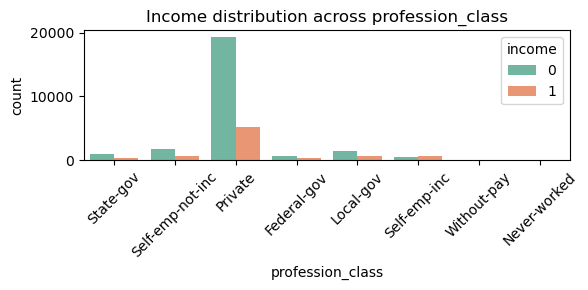

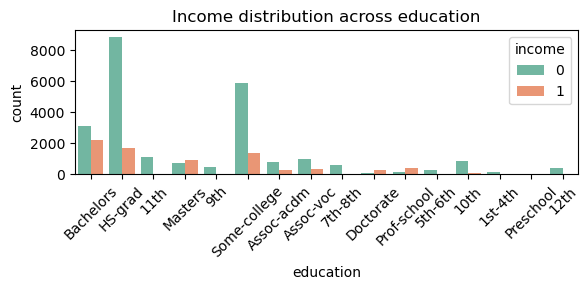

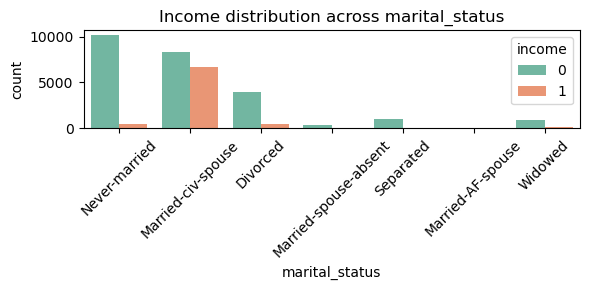

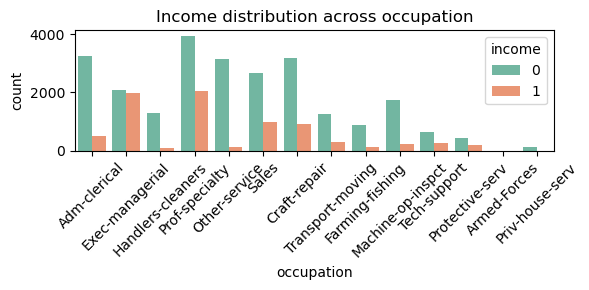

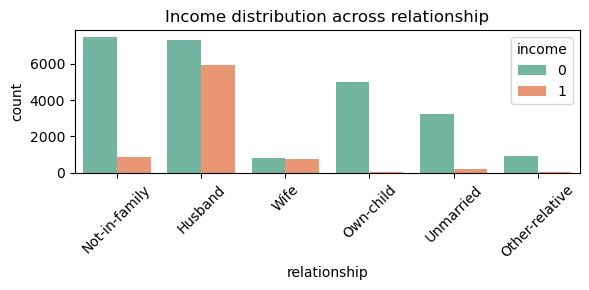

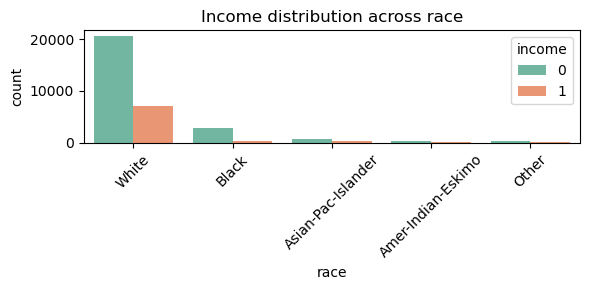

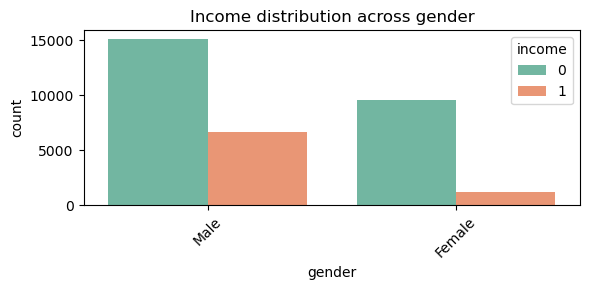

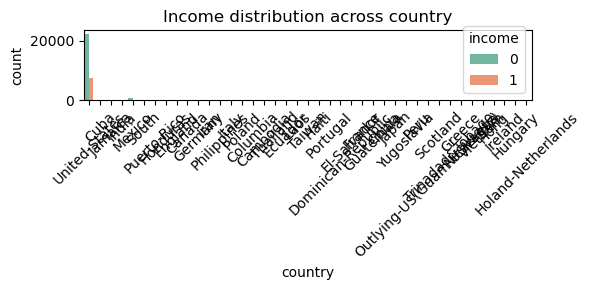

In [21]:
# Categorical vs Income
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='income', palette='Set2')
    plt.title(f"Income distribution across {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Few categories like profession_class(Private), marital_status(Married-civ-spouse), relationship(Husband), race(White), gender(Male) shows clear association with higher income level.

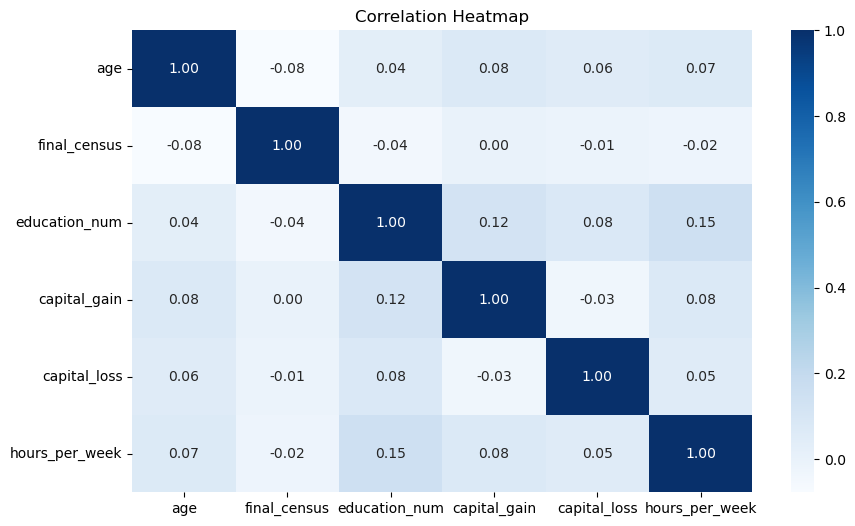

In [22]:
# 4. Correlation
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Interpretation:

- Since correlations are low, we don’t need to drop or combine any of these numeric features for collinearity reasons.
- Each variable brings unique information, so we’ll keep them all in our model pipeline.
- Relationships might be nonlinear, so tree-based models (like Random Forest, XGBoost) might capture them better than linear models.

- Also as we will try tree based models, we need not have to remove outliers either (less sensetive to outliers).

### 3.  Model Preparation & Preprocessing (for Tree-Based Models)

In [23]:
# 1. Train/Test Split
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (22792, 14)
Test shape: (9769, 14)


In [24]:
print(cat_cols)

Index(['profession_class', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'country'],
      dtype='object')


In [25]:
# 2. Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

cat_cols = ['profession_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'country']

# Label Encoding (this is safe to use cause trees don’t assume any order, and handle splits numerically)
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

print("Label Encoding complete for all categorical features.")

Label Encoding complete for all categorical features.


Scaling Numnerical features:

- Tree-based models don’t require scaling, because they split based on thresholds, not distances.

- We’ll skip StandardScaler/MinMaxScaler, keeping raw values - this preserves interpretability and reduces distortion from outliers.

In [26]:
# A check before we move forward to modeling
print("\nFinal Training Columns:\n", X_train.columns.tolist())
print("\nSample of processed training data:\n", X_train.head())


Final Training Columns:
 ['age', 'profession_class', 'final_census', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'country']

Sample of processed training data:
        age  profession_class  final_census  education  education_num  \
24029   43                 5         96129          1              7   
8788    18                 3        276864         15             10   
15564   34                 3        200192         15             10   
9585    17                 3        156736          0              6   
7377    41                 3        179580         15             10   

       marital_status  occupation  relationship  race  gender  capital_gain  \
24029               2           5             0     4       1             0   
8788                4           9             3     4       0             0   
15564               4           7             1     4       0     

### 4. Model Training & Evaluation

In [27]:
# Necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

In [28]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### 4.1. Let's try different Models on our data:

📊 Decision Tree Performance:
Accuracy: 0.8066
Precision: 0.5975
Recall: 0.6033
F1-Score: 0.6004
ROC-AUC: 0.7372

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7417
           1       0.60      0.60      0.60      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



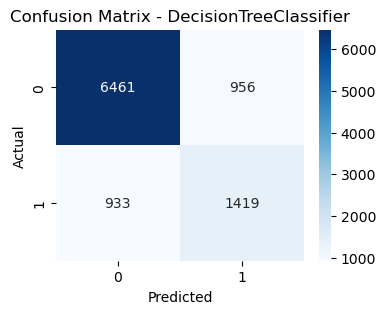

In [29]:
# 1. Decission Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("📊 Decision Tree Performance:")
evaluate_model(dt_model, X_test, y_test)

📊 Decision Tree Performance:
Accuracy: 0.8579
Precision: 0.7408
Recall: 0.6305
F1-Score: 0.6812
ROC-AUC: 0.7803

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7417
           1       0.74      0.63      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



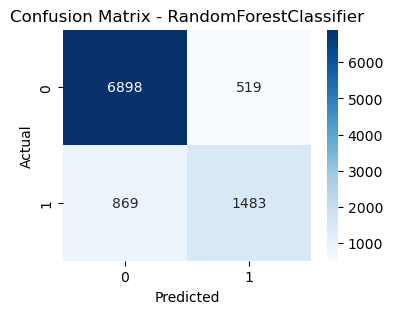

In [30]:
# 2. Random Forest Classifier

rf_model = RandomForestClassifier(
    n_estimators=200, random_state=42, max_depth=None, n_jobs=-1
)
rf_model.fit(X_train, y_train)

print("📊 Decision Tree Performance:")
evaluate_model(rf_model, X_test, y_test)

C:\Users\das10\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:53:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Performance:
Accuracy: 0.8751
Precision: 0.7861
Recall: 0.6611
F1-Score: 0.7182
ROC-AUC: 0.8021

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7417
           1       0.79      0.66      0.72      2352

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



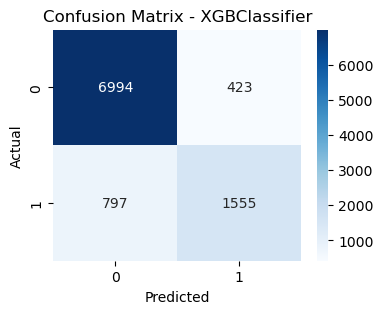

In [31]:
# 3. XGBoost Classifier

xgb_model = XGBClassifier(
    n_estimators=200, learning_rate=0.1, random_state=42,
    use_label_encoder=False, eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

print("📊 XGBoost Performance:")
evaluate_model(xgb_model, X_test, y_test)

#### 4.2. Compare Model Performance 

In [32]:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(results)
print("\nModel Comparison:\n")

# As the data is imbalanced (<50k : >50k ~ 70:30) --->
# F1-score gives you a much more honest reflection of how well the model identifies both income classes.
print(comparison_df.sort_values(by='F1-Score', ascending=False))



Model Comparison:

           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2        XGBoost  0.875115   0.786148  0.661139  0.718245  0.802054
1  Random Forest  0.857918   0.740759  0.630527  0.681213  0.780276
0  Decision Tree  0.806633   0.597474  0.603316  0.600381  0.737212


#### **Conclusion :**
*XGBoost* performs the best among all models:

- Achieved the **highest accuracy (87.5%)**, **best F1-score (0.72)**, and **best ROC-AUC (0.80)**  
- More consistent at identifying `>50K` earners (**higher recall**)  
- More confident when it predicts `>50K` (**higher precision**)  
- Handles **class imbalance** effectively and generalizes better than others  

*Final Choice:* `XGBoost` is the most reliable model for income prediction in this dataset.

### 5. Hyperparameter Tuning + Feature Importance (for XGBoost) 

In [33]:
# 5.1. Hyperparameter Tuning (Full Grid Search)

# Necessary Library
from sklearn.model_selection import GridSearchCV

# Base model
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\das10\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:08:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best F1 Score: 0.716761762271014


C:\Users\das10\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:08:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


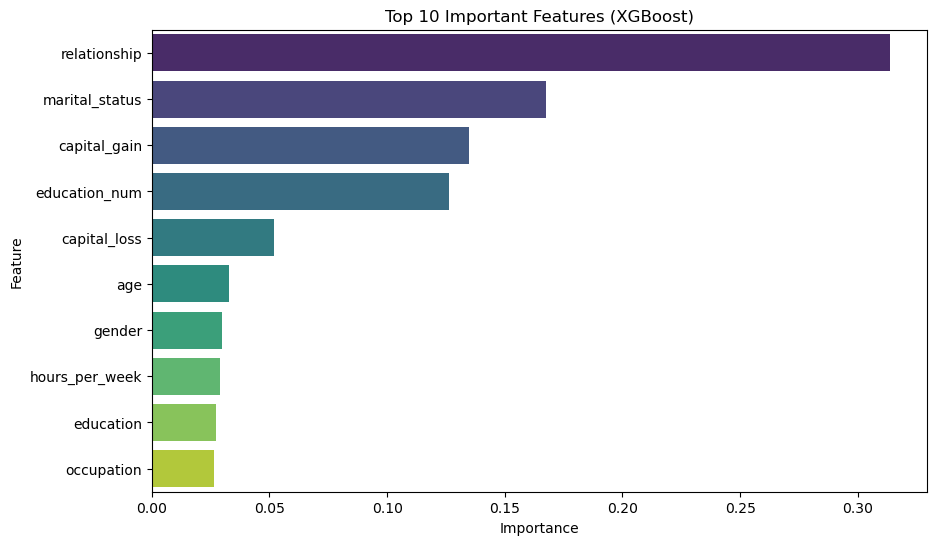

In [34]:
# 5.2. Feature Importance & Model Interpretation

from xgboost import XGBClassifier, plot_importance

# Train final model using best params
xgb_best = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=7,
    n_estimators=300,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_best.fit(X_train, y_train)

# Get feature importances
importances = xgb_best.feature_importances_
features = X_train.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plotting top 10 features
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()


#### Summary:
- **Relationship** and **Marital Status** dominate income prediction — showing strong social and lifestyle correlation.  
- **Capital Gain** and **Education_num** highlight financial activity and education as key economic drivers.  
- Work effort (`hours_per_week`) and demographic traits (`age`, `gender`) play supportive roles. Along with `capital_lose`, often associated with people who actively invest or trade assets showing some influence. 